In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import  BoundaryNorm
from matplotlib.cm import ScalarMappable

import geopandas as gpd
import cartopy.crs as ccrs

plt.rcParams['date.converter'] = 'concise'

## 柱状

In [2]:
dat = np.genfromtxt('../data/global_temperature/MOD_LSTD_E_2021-08-29_gs_720x360.CSV', delimiter=',')
dat = np.where(dat<1000, dat, np.nan)
dat = dat[::-1, :]
lon = np.arange(-180.0, 180, 0.5)
lat = np.arange(-90.0, 90, 0.5)

In [3]:
# 转为三列的DataFrame
df = pd.DataFrame(dat, index=lat, columns=lon)
df = df.stack().reset_index()
df.columns = ['lat', 'lon', 'temperature']
df

,lat,lon,temperature
0,-90.0,-180.0,-25.000000
1,-90.0,-179.5,-25.000000
2,-90.0,-179.0,-25.000000
3,-90.0,-178.5,-25.000000
4,-90.0,-178.0,-25.000000
...,...,...,...
82989,83.0,-30.0,-0.472441
82990,83.0,-29.5,-0.196850
82991,83.0,-29.0,-0.748031
82992,83.0,-28.5,-2.401575


([], [])

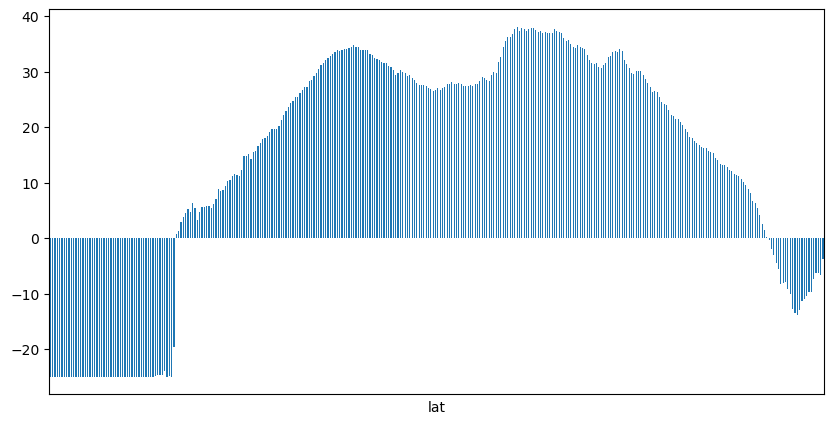

In [4]:
df.groupby('lat')['temperature'].mean().plot(kind='bar', figsize=(10,5))
plt.xticks([])

([], [])

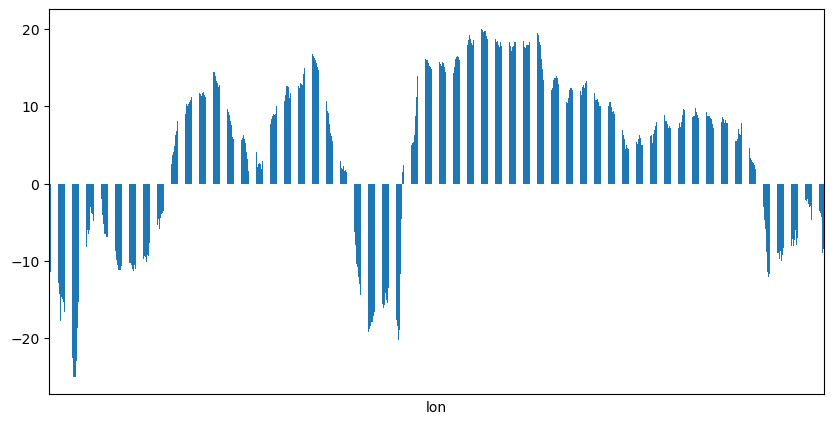

In [5]:
df.groupby('lon')['temperature'].mean().plot(kind='bar', figsize=(10,5))
plt.xticks([])

## 全球一日

In [6]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs=4326)
gdf

,lat,lon,temperature,geometry
0,-90.0,-180.0,-25.000000,POINT (-180 -90)
1,-90.0,-179.5,-25.000000,POINT (-179.5 -90)
2,-90.0,-179.0,-25.000000,POINT (-179 -90)
3,-90.0,-178.5,-25.000000,POINT (-178.5 -90)
4,-90.0,-178.0,-25.000000,POINT (-178 -90)
...,...,...,...,...
82989,83.0,-30.0,-0.472441,POINT (-30 83)
82990,83.0,-29.5,-0.196850,POINT (-29.5 83)
82991,83.0,-29.0,-0.748031,POINT (-29 83)
82992,83.0,-28.5,-2.401575,POINT (-28.5 83)


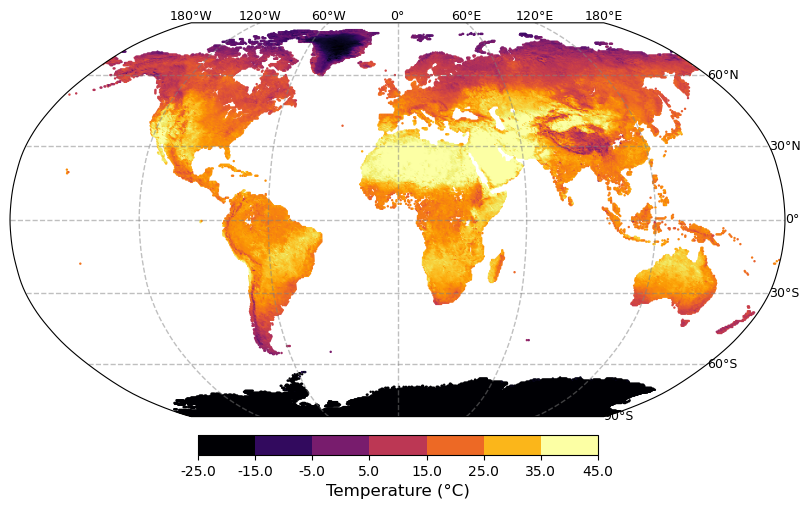

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()}, figsize=(10, 10))
ax.set_global()

temperature = gdf.plot(ax=ax, transform=ccrs.PlateCarree(), column='temperature',
         markersize=3, alpha=1, edgecolors='none', cmap='inferno', legend=False)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

# 经纬网
lat_labels = np.arange(-90, 61, 30)  # -90, -60, -30, 0, 30, 60
for lat in lat_labels:
    direction = 'N' if lat > 0 else ('S' if lat < 0 else '')
    label = f"{abs(lat)}°{direction}"
    ax.text(180, lat, label, transform=ccrs.PlateCarree(),
            va='center', ha='left', fontsize=9, color='black', clip_on=False)
lon_labels = np.arange(-180, 181, 60)  # -180, -120, ..., 180
for lon in lon_labels:
    direction = 'E' if lon > 0 else ('W' if lon < 0 else '')
    label = f"{abs(lon)}°{direction}"
    ax.text(lon, 90, label, transform=ccrs.PlateCarree(),
            va='bottom', ha='center', fontsize=9, color='black', clip_on=False)

# cbar
min_temp = gdf['temperature'].min()
max_temp = gdf['temperature'].max()
num_bins = 7
bins = np.linspace(min_temp, max_temp, num_bins + 1)
nbin = len(bins) - 1
cmap = plt.get_cmap('inferno', nbin)
norm = BoundaryNorm(bins, nbin)

im = ScalarMappable(norm=norm, cmap=cmap)
im.set_array([])

cbar_width = 0.4
cbar_height = 0.02
cbar_bottom = 0.26
cbar_left = (1 - cbar_width) / 2 +0.013
cbar_ax = fig.add_axes([cbar_left, cbar_bottom, cbar_width, cbar_height])

cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Temperature (°C)', fontsize=12)
cbar.set_ticks(bins)
cbar.set_ticklabels([f'{b:.1f}' for b in bins])

plt.show()

## 合并

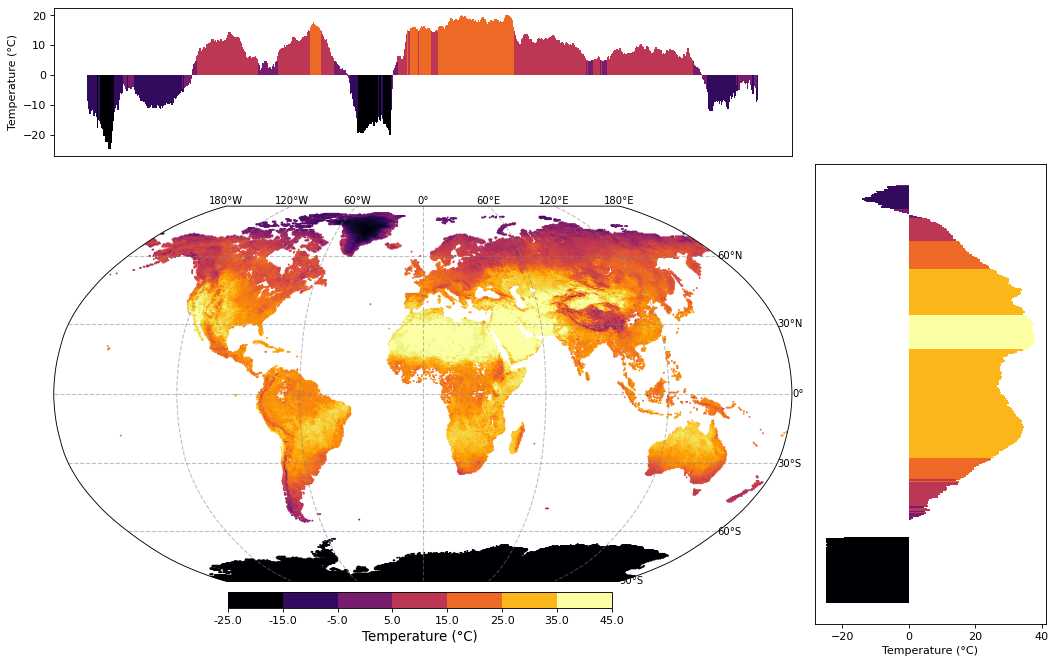

In [8]:
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.05, wspace=0.1)


ax_main = fig.add_subplot(grid[1:, :-1], projection=ccrs.Robinson())
ax_right = fig.add_subplot(grid[1:, -1], yticklabels=[])
ax_top = fig.add_subplot(grid[0:1, 0:-1], xticklabels=[])

ax_main.set_global()
temperature = gdf.plot(ax=ax_main, transform=ccrs.PlateCarree(), column='temperature',
         markersize=3, alpha=1, edgecolors='none', cmap='inferno', legend=False)
gl = ax_main.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

# 经纬网
lat_labels = np.arange(-90, 61, 30)  # -90, -60, -30, 0, 30, 60
for lat in lat_labels:
    direction = 'N' if lat > 0 else ('S' if lat < 0 else '')
    label = f"{abs(lat)}°{direction}"
    ax_main.text(180, lat, label, transform=ccrs.PlateCarree(),
            va='center', ha='left', fontsize=9, color='black', clip_on=False)
lon_labels = np.arange(-180, 181, 60)  # -180, -120, ..., 180
for lon in lon_labels:
    direction = 'E' if lon > 0 else ('W' if lon < 0 else '')
    label = f"{abs(lon)}°{direction}"
    ax_main.text(lon, 90, label, transform=ccrs.PlateCarree(),
            va='bottom', ha='center', fontsize=9, color='black', clip_on=False)

# cbar
min_temp = gdf['temperature'].min()
max_temp = gdf['temperature'].max()
num_bins = 7
bins = np.linspace(min_temp, max_temp, num_bins + 1)
nbin = len(bins) - 1
cmap = plt.get_cmap('inferno', nbin)
norm = BoundaryNorm(bins, nbin)

im = ScalarMappable(norm=norm, cmap=cmap)
im.set_array([])

cbar_width = 0.3
cbar_height = 0.02
cbar_bottom = 0.13  # 距离底部的位置
cbar_left = (1 - cbar_width) / 2 - 0.089
cbar_ax = fig.add_axes([cbar_left, cbar_bottom, cbar_width, cbar_height])

cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Temperature (°C)', fontsize=12)
cbar.set_ticks(bins)
cbar.set_ticklabels([f'{b:.1f}' for b in bins])

# 上右
df0 = df.groupby('lon')['temperature'].mean().reset_index()
df0 = df0.sort_values('lon', ascending=False)
df0['color'] = [cmap(norm(temp)) for temp in df0['temperature']]
ax_top.bar(df0['lon'], df0['temperature'], color=df0['color'])
ax_top.set_xticks([])
ax_top.set_xlabel('')
ax_top.set_ylabel('Temperature (°C)')

df0 = df.groupby('lat')['temperature'].mean().reset_index()
df0 = df0.sort_values('lat', ascending=False)
df0['color'] = [cmap(norm(temp)) for temp in df0['temperature']]
ax_right.barh(df0['lat'], df0['temperature'], color=df0['color'])
ax_right.set_yticks([])
ax_right.set_ylabel('')
ax_right.set_xlabel('Temperature (°C)')

plt.show()